In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib


✅ Dataset loaded successfully!

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64


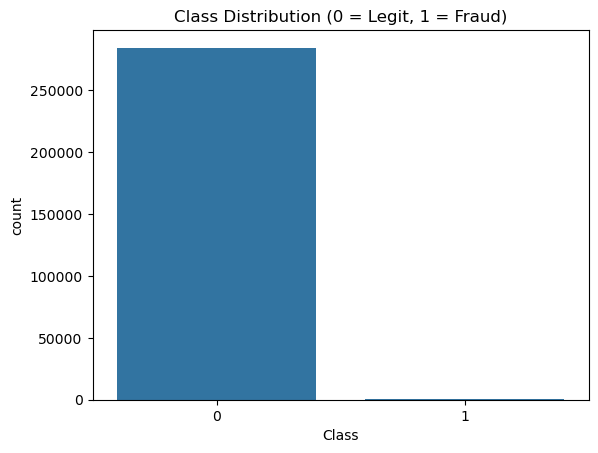


✅ Data split into training and testing sets.

✅ Applied SMOTE to balance the classes.

✅ Model trained successfully!

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962


--- ROC AUC Score ---
ROC-AUC: 0.9233726657517257

--- Confusion Matrix ---


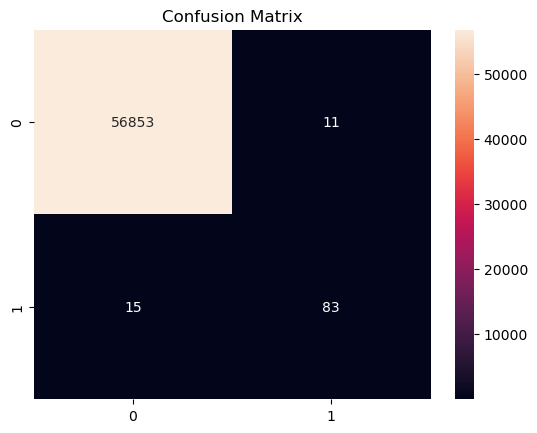


✅ Model saved as 'fraud_model.pkl'


In [2]:
# 📦 Step 1: Install Required Libraries
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn joblib

# 📚 Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib

# ✅ Step 3: Load the Dataset
df = pd.read_csv("C:/Users/hassa/Desktop/Fraud Detection/creditcard.csv")  # Make sure this matches your file name
print("✅ Dataset loaded successfully!")

# 📊 Step 4: Basic Exploration
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Class Distribution ---")
print(df["Class"].value_counts())

# 📈 Step 5: Visualize Class Distribution
sns.countplot(x="Class", data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()

# 🧹 Step 6: Preprocessing
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])
df.drop(["Time"], axis=1, inplace=True)

# 🎯 Step 7: Define Features & Target
X = df.drop("Class", axis=1)
y = df["Class"]

# 🔀 Step 8: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n✅ Data split into training and testing sets.")

# ⚖️ Step 9: Handle Class Imbalance with SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("\n✅ Applied SMOTE to balance the classes.")

# 🧠 Step 10: Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)
print("\n✅ Model trained successfully!")

# 📊 Step 11: Evaluate the Model
y_pred = model.predict(X_test)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- ROC AUC Score ---")
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

print("\n--- Confusion Matrix ---")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

# 💾 Step 12: Save the Trained Model
joblib.dump(model, "fraud_model.pkl")
print("\n✅ Model saved as 'fraud_model.pkl'")
